# 셀프 주유소는 정말 저렴할까?
- 오피넷 검색

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 서울시 구별 주유소 가격 정보 얻기

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

In [3]:
# 싼 주유소 찾기 화면
driver.find_element_by_css_selector('.ic_m1').click()

In [4]:
# 서울 자치구 리스트 가져오기 서울 자치구 리스트 가져오기
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]   # 시/군/구 지우기
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [5]:
gu = gu_names[0]
region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(gu)

In [6]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()   # 엑셀저장 - 다운로드 디렉토리에 저장됨

In [7]:
for gu in gu_names:
    region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(2)

In [8]:
driver.close()

### 구별 휘발유 가격에 대한 데이터 정리

In [9]:
import pandas as pd
from glob import glob

In [10]:
glob('/Users/CPB06GameN/Downloads/지역*.xls')   # 리스트로 출력

['/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (1).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (10).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (11).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (12).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (13).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (14).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (15).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (16).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (17).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (18).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (19).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (2).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (20).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (21).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (22).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (23).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (24).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (25).xls',
 '/Users/CPB06GameN/Downloads\

In [11]:
file = glob('/Users/CPB06GameN/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1585,1385,-
1,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1761,1593,1389,-
2,서울특별시,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1600,1400,-
3,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1771,1603,1399,-
4,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1607,1409,-


In [12]:
# 25개 파일을 읽어 하나의 데이터프레임으로 만듦
raw = []
for file in glob('/Users/CPB06GameN/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    raw.append(df)

station_raw = pd.concat(raw)

In [13]:
station_raw.info() # 필요한 항목 고르기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      527 non-null    object
 1   상호      527 non-null    object
 2   주소      527 non-null    object
 3   상표      527 non-null    object
 4   전화번호    527 non-null    object
 5   셀프여부    527 non-null    object
 6   고급휘발유   527 non-null    object
 7   휘발유     527 non-null    object
 8   경유      527 non-null    object
 9   실내등유    527 non-null    object
dtypes: object(10)
memory usage: 45.3+ KB


In [14]:
stations = pd.DataFrame({
    '상호': station_raw.상호,
    '주소': station_raw.주소,
    '가격': station_raw.휘발유,
    '셀프': station_raw.셀프여부,
    '상표': station_raw.상표
})
stations.head()

,상호,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1585,Y,SK에너지
1,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1593,Y,SK에너지
2,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1600,Y,GS칼텍스
3,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1603,Y,현대오일뱅크
4,방죽주유소,서울 강남구 밤고개로 215 (율현동),1607,Y,GS칼텍스


In [15]:
stations['구'] = [addr.split()[1] for addr in station_raw.주소]
stations.tail()

,상호,주소,가격,셀프,상표,구
35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113,N,GS칼텍스,강남구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구
37,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
39,역삼주유소,서울 강남구 역삼로 205,-,N,GS칼텍스,강남구


In [16]:
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [17]:
stations = stations[stations['가격'] != '-']
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      511 non-null    object
 1   주소      511 non-null    object
 2   가격      511 non-null    int64 
 3   셀프      511 non-null    object
 4   상표      511 non-null    object
 5   구       511 non-null    object
dtypes: int64(1), object(5)
memory usage: 27.9+ KB


### 셀프주유소가 정말 저렴한지 확인


In [18]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams["font.family"] = 'Malgun Gothic'

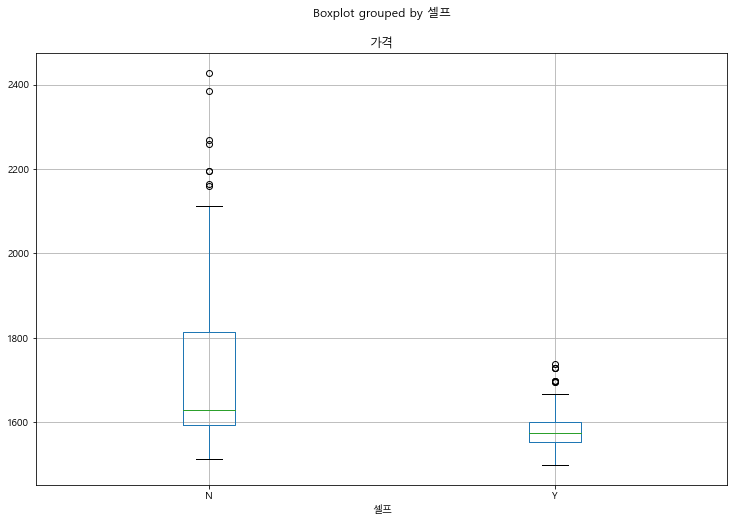

In [20]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

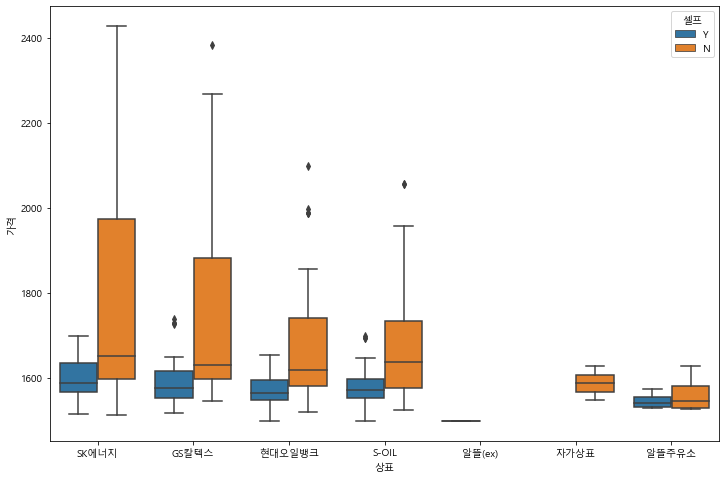

In [21]:
# 상표별로 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations)
plt.show()

### 서울시 구별 휘발유 가격 확인

In [22]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# 가격이 비싼 주유소 Top5
stations.sort_values(by='가격', ascending=False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2269,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259,N,SK에너지,중구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구


In [24]:
# 가격이 착한 주유소 Top5
stations.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1499,Y,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499,Y,S-OIL,강북구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1514,N,SK에너지,양천구
0,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515,Y,현대오일뱅크,영등포구


In [25]:
gu_data = stations.groupby('구')[['가격']].mean()
gu_data

,가격
구,
강남구,1785.675676
강동구,1677.562500
강북구,1534.846154
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1568.083333
노원구,1612.214286


In [26]:
geo_path = '../04.지도_공공API/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [27]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)
map.choropleth(
    geo_data = geo_data,
    data = gu_data.가격,
    columns = [gu_data.index, gu_data.가격],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)
map